# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# General description of our dataset 

In [823]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline


df = pd.read_csv('data/human_body_temperature.csv')

In [824]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


There is not null values for this dataset

In [825]:
# Searching for duplicates
df[df.duplicated()] 

,temperature,gender,heart_rate
75,98.8,M,78.0
87,98.0,M,78.0
127,98.2,F,73.0


Due to the nature of this dataset, duplicate values  can be possible.
Next question could be: are there outliers?
Another interesting questions is if these duplicate entries are  outliers.
Let us explore the temperature column with boxplot 

Text(0,0.5,'Temperature')

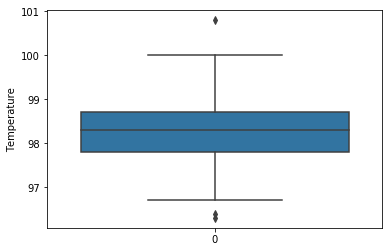

In [826]:
sns.boxplot(data=df.temperature, orient="v")
plt.ylabel("Temperature")

From the above figure it seems that we have outliers

In [827]:
 # Outliers function 
from scipy.stats import zscore
def outliers(column,threshold=1):# This function return outliers for a given column
    """
    The variable column is the column  we are interested, threshold defines if a point is an outlier.
    zscore calculate the z score of each entry of our column
    this function return a boolean array where True mean that the point is an outlier
    """
    return ( zscore(column)< -threshold) | (zscore(column) > threshold) 
df[outliers(df.temperature,threshold=2.5)] # outliers associated to temperature for a threshold=2.5

,temperature,gender,heart_rate
39,96.4,F,69.0
116,100.8,F,77.0
125,96.3,M,70.0


From above results we can conclude:
1. These temperature outliers need further investigation(Usually temperatures around 96 F can be considered hypothermia and a temperature over 100.4 F are considered fever)
2. Duplicates values are not outliers

In [828]:
# Outliers for heart rate
df[outliers(df.heart_rate,threshold=2.5)] 

,temperature,gender,heart_rate


heart_rate outliers, in this case there are not outliers for heart rate

# Is the distribution of body temperatures normal?

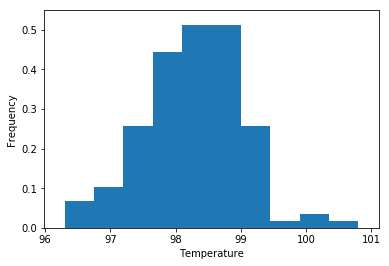

In [829]:
# Histogram
plt.hist(df.temperature,normed = True,bins= 10) # Histogram for the temperature column
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.margins(0.07)

Look like our data is described by a Bell shaped distribution function.

A way to test normality condition is through Q-Q plot

Text(0.5,1,'Q-Q plot of temperature')

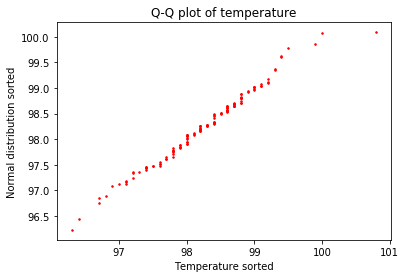

In [830]:
# Mean and standard error(std) for the temperature and heart  rate
mean_temp, std_temp = np.mean(df.temperature),np.std(df.temperature)
mean_heart_r, std_heart_r = np.mean(df.heart_rate),np.std(df.heart_rate)

# sorted list of temperatures
temp_sorted = sorted(df.temperature) 

np.random.seed(22) # random seed
# Sorted list of normally distributed data with the same mean, std and number of points than the temperature column
normal_dist =sorted(np.random.normal(mean_temp, std_temp,len(df.temperature)))
# Q-Q plot
_ = plt.plot(temp_sorted,normal_dist, marker='.',linestyle = "none",color = "red",markersize = 3)
plt.xlabel("Temperature sorted")
plt.ylabel("Normal distribution sorted")
plt.title("Q-Q plot of temperature")

From the previous figure we can see a linear relation between temperature quantile and normal quantile, so, our data can be described by a normal distribution.

Another way to check normality is by using  cumulative distribution functions(ecdf)

In [831]:
def ecdf(data):
    """
    This function(cumulative distribution function) return a 
    sorted list of data(x) and these percentiles(y)
    """
    n = len(data)
    # x-data for the ECDF: x
    x  = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

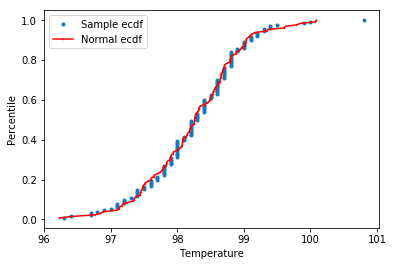

In [832]:
# ecdf for the temperature
sample_temp, sample_quantile = ecdf(df.temperature)
# ecdf for a normal distribution with the same mean, std and number of data points than temperature
temp_normal,normal_quantile= ecdf(normal_dist)
# Plot of temperature ecdf
_ = plt.plot(sample_temp, sample_quantile , marker='.',linestyle = "none",alpha = 2)
# Plot of normal ecdf
_ = plt.plot(temp_normal,normal_quantile, marker='.',color = "red",markersize = 1)
plt.xlabel("Temperature")
plt.ylabel("Percentile")
plt.legend(["Sample ecdf","Normal ecdf"])
plt.show()

Again, it seems that normal distribution is good approximation for our data

# Is the sample size large? Are the observations independent?

Because our data of temperature is almost normaly distributed, we can say that if the number of observations is larger than 30 the sample is considered large. Let us consider that the subjects of the experiment were chosen randomly.

# Is the true population mean really 98.6 degrees F?

We can approach this question through hypothesis test methods. In this case we need to compare test statistic(mean temperature ) of our sample vs a number(98.6 F), then, one-sample test is an appropriate method.

In this situation, is it appropriate to use the  t  or  z  statistic?

The standard deviation of our population is unknown, then, we should use t-test 

$H_{0}$: Null hypothesis True mean = 98.6 F ($\mu = 98.6$ F)

$H_{a}$: Alternative hypothesis True mean different of  98.6 F ($\mu \neq 98.6$ F)

By using classical t-test 

In [817]:
stats.ttest_1samp(df.temperature,98.6) # classical two sided t-test 

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Now, let us use z-test. Since the number of observations is over 30 both results should be similar. By using same null and alternative hypotheses than above.

In [818]:
def z_test_one_sample(data,reference):
    # z score associated to the sampling distribution: 
    z_score= (np.mean(data) -reference)/(np.std(data)/np.sqrt(len(data)))
    # Two-tail p-value
    return 2*stats.norm.cdf(z_score)

print("P-value is {}".format(z_test_one_sample(df.temperature,98.6)))

P-value is 4.3523151658821886e-08


Let us note that P-value of the z-test is smaller than t-test that is due to t-distribution has a heavier tail compared with the normal distribution.

Let us use the hacker statistics method of the curriculum

In [835]:
def draw_bs_reps(data, function, size=1):
    """Draw size bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = function(np.random.choice(data, size=len(data)))

    return bs_replicates

# New traslated data where the mean value is 98.6 F
def one_sample_test(empirical_data,function,number_of_replicates,reference):
    simulated_temp = empirical_data -function(empirical_data) + reference
    # Take bootstrap replicates of traslated empirical_data: bs_replicates
    bs_replicates = draw_bs_reps(simulated_temp, function, number_of_replicates)
    
    # Compute fraction of replicates that are less than the observed test statistic (function(empirical_data)): p
    p = np.sum(bs_replicates <= function(empirical_data)) / number_of_replicates
    # return the p-value
    return p
print("P-value")
print(one_sample_test(df.temperature,np.mean,10000,98.6))

P-value
0.0


Since p-values are very small for all above methods we can reject the null hypothesis(mean temperature is not 98.6 F)

# Draw a small sample of size 10 from the data and repeat both tests
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

Now we have a small sample with unknown standard deviation. In this case t-test is more appropriate(same hypothesis than previous exercise). 

In [841]:
np.random.seed(12)
# Number of samples
N_small_samples = 10 
# Random sample from our data 
small_sample = np.random.choice(df.temperature, size = N_small_samples)
print("P-value: {}".format(stats.ttest_1samp(small_sample,98.6)[1]))

P-value: 0.16189396419359592


In [844]:
# Ztest 
print("P-value: {}".format(z_test_one_sample(small_sample,98.6)))

P-value: 0.10822457763381935


Essentially the results of t-test and z-test  are similar, this time p-values are greater,so ,we are less confident to reject the null hypothesis. As we mention above, z-test has a smaller p-value because its tail is thinner. En general, p-values are greater when the sample size is small.

Now, ten observations are a small number, so, we should expect variability when one chooses different samples of the same size. In the following figure we explore the behavior of the p-values for many samples of size ten.

Mean p-value is :0.25041830515420815
Confident interval is: (0.24358173769162703, 0.25725487261678931)


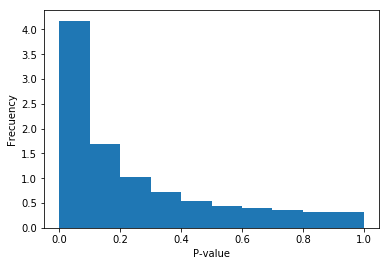

In [845]:
np.random.seed(12)
# Generate 1000 random samples of size 10
pv = [stats.ttest_1samp(np.random.choice(df.temperature, size = 10),98.6)[1]\
      for _ in range(10000)]
# Mean p-value
print("Mean p-value is :{}".format(np.mean(pv)))
# Confident onterval for this p-value
print("Confident interval is: {}".format(stats.t.interval(alpha = 0.99, df= len(pv)-1,loc = np.mean(pv),\
                                           scale = np.std(pv)/np.sqrt(len(pv)))))
# Histogram for 1000 samples 
plt.hist(pv,normed = True) 
plt.xlabel("P-value")
plt.ylabel("Frecuency")
plt.show()
    

The above figure shows how the variability are large when the sample size are  small.

But, what is our mean body temperature? 

In [861]:
# standard error for the sampling distribution 
std_sampling = std_temp/(np.sqrt(len(df.temperature)))
# Confident interval for 99% of the data
print("Mean normal temperature consistent with our data is: {}".format(mean_temp))
print("Confident interval: {}".format(stats.t.interval\
                                                        (alpha = 0.99, df= len(df.temperature)-1,loc = mean_temp,scale = std_sampling))) 

Mean normal temperature consistent with our data is: 98.24923076923078
Confident interval: (98.081756115816447, 98.416705422645109)


# At what temperature should we consider someone's temperature to be "abnormal"?

Abnormal temperatures should not be common, our data approximately follows a normal distribution. For this distribution function, any point beyond two standard deviations(more that 95% of data) can be considered abnormal(outliers)

In [801]:
# Confident interval for 95% of the data
stats.t.interval(alpha = 0.95, df= len(df.temperature)-1,loc = mean_temp,scale = std_temp) 

(96.804200016139845, 99.69426152232171)

We can define as abnormal any temperature outside the above range, which is consistent with the standard used by physicians.

# Is there a significant difference between males and females in normal temperature?

What test did you use and why?

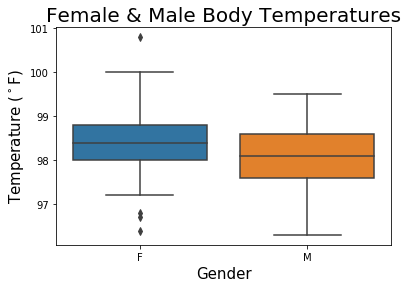

In [846]:
# Create boxplots for temperature by gender:
sns.boxplot(x='gender', y='temperature', data=df)
plt.xlabel('Gender',fontsize = 15)
plt.ylabel('Temperature ($^\circ$F)',fontsize = 15)
plt.title('Female & Male Body Temperatures', fontsize=20)
plt.show()

In [847]:
females_t = df[df.gender == "F"]
males_t = df[df.gender == "M"]
females_mean,females_std = np.mean(females_t.temperature),np.std(females_t.temperature)
males_mean,males_std = np.mean(males_t.temperature),np.std(males_t.temperature)
print("Tolal number of females in our dataset is {}".format(len(females_t)))
print("Tolal number of males in our dataset is {}".format(len(males_t)))
print("Female mean is {}F, with a standard error of {}F".format(females_mean,females_std))
print("Male mean is {}F, with a standard error of {}F".format(males_mean,males_std))
print("Mean difference of temperatures is {}F".format(females_mean -males_mean))

Tolal number of females in our dataset is 65
Tolal number of males in our dataset is 65
Female mean is 98.39384615384613F, with a standard error of 0.7377464486428966F
Male mean is 98.1046153846154F, with a standard error of 0.6933598841828696F
Mean difference of temperatures is 0.289230769230727F


The above figure and the values of means and standard errors suggest that normal temperature could depend on gender(at least from the statistical point of view).

What test did you use and why?

In this case our test statistic is the difference of mean temperatures between men and women, in other words, we need to compare mean temperature of two independent samples(women and men) and check if the observed difference is statistically significant or it is just by chance. Then, in this case, two-sample test is an appropriate method.

The standard deviation of our populations are unknown, then, we should use t-test 

$H_{0}$: Null hypothesis there is not difference $\mu_{men} = \mu_{women}$

$H_{a}$: Alternative hypothesis there is a difference $\mu_{men} \neq \mu_{women}$

First let use a classical two sample t-test 

In [848]:
stats.ttest_ind(females_t.temperature, males_t.temperature, equal_var = False)

Ttest_indResult(statistic=2.2854345381656112, pvalue=0.023938264182934196)

Let us use the hacker statistic method used in the curriculum

In [849]:
def permutation_sample(data1, data2):
    """Return a permutation sample from two data sets."""

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Randonly permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Separate the new array into two samples:
    permuted_sample_1 = permuted_data[:len(data1)]
    permuted_sample_2 = permuted_data[len(data1):]

    return permuted_sample_1, permuted_sample_2


def draw_permutation_replicates(data_1, data_2, function, size=1):#Draw multiple permutation replicates

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = function(permutation_sample_1, permutation_sample_2)

    return permutation_replicates

def two_sample_test(data1,data2,test_statistic,number_of_replicates):
    np.random.seed(12)
    # test statistic of our two sample test
    our_sample_difference = test_statistic(data1,data2)
    # Generate a list of replicates 
    permutation_replicates = draw_permutation_replicates(data1, data2, test_statistic, size=number_of_replicates)
    
    # Compute fraction of replicates that are greater than the observed test statistic
    p = np.sum(permutation_replicates >= our_sample_difference) / len(permutation_replicates)
    # return the p-value
    return p

def difference_of_means(data_1, data_2):#Return the difference in means of two arrays

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

In [850]:
# P-value for test statistic associated to females_t.temperature and males_t.temperature 
print("P-values:{}".format(two_sample_test(females_t.temperature,\
                                           males_t.temperature,difference_of_means,10000)))

P-values:0.0122


From above two methods we can conclude there is a statistical significant difference in normal temperatures associated to gender. Although this difference seems small(less than 1 F) it could have practical importance because this tiny difference could be consequence of the differences in the anatomy  and physiology between men and women.

# Revisiting the question: Is the distribution of body temperatures normal?

Let us use the above hypothesis test method to check if our data of temperature comes from a normal distribution.

Null hypothesis: Our data follows a normal distribution

Alternative hypothesis: not null hypothesis

In [852]:
# Normal distributed data with the same mean and standard error that our data(temperature)
rvs = stats.norm.rvs(loc = mean_temp, scale = std_temp,size=5000)
print("p-value:{}".format(two_sample_test(rvs,df.temperature,difference_of_means,10000)))

p-value:0.6103


The above p-value is high, so, we fail to reject the null hypothesis. There is not statistical evidence that our data does not come from a normal distribution. Although this does not prove that our data follows a normal distribution it is consistent with graphical methods used previously.

# Conclusions

* By using graphical  and hypothesis test methods we show that our data can be described approximately by a normal distribution.
* Classical one-sample hypothesis test(t-test and z-test) and hacker statistic methods show that our data **does not** have a normal temperature of 98.6 F. Instead, our normal body temperature is in the range of 98.0 F to 98.4 F with 99% of confidence.
* Also, even for sub-samples of size ten one can show that 98.6 F is a wrong value for the mean body temperature. Although, this time p-values are greater.
* Here, we identify abnormal temperature with outliers. Where, we define outliers as values that are outside of the 95% range of variation of our data. 
* Although tiny, there is a statistical difference in temperature associated to gender.